In [3]:
# install：pip install transformers torch matplotlib numpy

from transformers import pipeline, AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
import re

print("=== Loading Modern NLP Models ===")
# load pre-trained model（small and fast）
sentiment_analyzer = pipeline("sentiment-analysis", 
                             model="distilbert-base-uncased-finetuned-sst-2-english")
text_generator = pipeline("text-generation", 
                         model="distilgpt2", 
                         max_length=50)

def traditional_sentiment(text):
    """traditional dictionary method"""
    positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'wonderful']
    negative_words = ['bad', 'terrible', 'awful', 'hate', 'horrible', 'worst']
    
    text_lower = text.lower()
    pos_count = sum(1 for word in positive_words if word in text_lower)
    neg_count = sum(1 for word in negative_words if word in text_lower)
    
    if pos_count > neg_count:
        return "POSITIVE", pos_count - neg_count
    elif neg_count > pos_count:
        return "NEGATIVE", neg_count - pos_count
    else:
        return "NEUTRAL", 0

def modern_sentiment(text):
    """Moder Deep Learning"""
    result = sentiment_analyzer(text)[0]
    return result['label'], result['score']

# challenge cases
challenging_texts = [
    "This movie is not good",  # negative
    "The acting was bad but the story was amazing",  # mixed
    "So disappointed, expected much better",  # hidden negative
    "It's so bad it's good",  # complex
    "Incredibly underwhelming experience"  # subtle negative
]

print("=== Sentiment Analysis Comparison ===")
for text in challenging_texts:
    trad_label, trad_score = traditional_sentiment(text)
    mod_label, mod_score = modern_sentiment(text)
    
    print(f"\nText: '{text}'")
    print(f"Traditional: {trad_label} (score: {trad_score})")
    print(f"Modern:      {mod_label} (confidence: {mod_score:.3f})")
    print(f"Winner: {'🤖 Modern' if mod_score > 0.8 else '🤔 Unclear'}")

=== Loading Modern NLP Models ===


Device set to use mps:0
Device set to use mps:0


=== Sentiment Analysis Comparison ===

Text: 'This movie is not good'
Traditional: POSITIVE (score: 1)
Modern:      NEGATIVE (confidence: 1.000)
Winner: 🤖 Modern

Text: 'The acting was bad but the story was amazing'
Traditional: NEUTRAL (score: 0)
Modern:      POSITIVE (confidence: 1.000)
Winner: 🤖 Modern

Text: 'So disappointed, expected much better'
Traditional: NEUTRAL (score: 0)
Modern:      NEGATIVE (confidence: 1.000)
Winner: 🤖 Modern

Text: 'It's so bad it's good'
Traditional: NEUTRAL (score: 0)
Modern:      POSITIVE (confidence: 0.993)
Winner: 🤖 Modern

Text: 'Incredibly underwhelming experience'
Traditional: NEUTRAL (score: 0)
Modern:      NEGATIVE (confidence: 0.999)
Winner: 🤖 Modern


In [4]:
def intelligent_text_completion():
    """demonstrate modern text generation"""
    
    prompts = [
        "Artificial intelligence is",
        "The future of programming will be",
        "Machine learning helps us",
        "In the next 10 years, technology will"
    ]
    
    print("=== Modern Text Generation ===")
    
    for prompt in prompts:
        print(f"\nPrompt: '{prompt}'")
        
        # generate multiple candidates
        results = text_generator(prompt, 
                                max_length=30, 
                                num_return_sequences=3, 
                                temperature=0.7,
                                pad_token_id=50256)
        
        for i, result in enumerate(results, 1):
            generated_text = result['generated_text'][len(prompt):].strip()
            print(f"  {i}. {generated_text}")
    
    # interactive
    print("\n=== Try Your Own Prompts! ===")
    custom_prompts = [
        "Programming is fun because",
        "The most important skill for AI engineers is",
        "When I graduate, I want to"
    ]
    
    for prompt in custom_prompts:
        result = text_generator(prompt, max_length=25, num_return_sequences=1)[0]
        completion = result['generated_text'][len(prompt):].strip()
        print(f"'{prompt}' → '{completion}'")

intelligent_text_completion()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


=== Modern Text Generation ===

Prompt: 'Artificial intelligence is'
  1. not necessarily a tool for a specific purpose. A person  has a basic knowledge of their own personal life and is a part
  2. a technology that is based on robots that can perform tasks such as controlling the room temperature, driving the road, and even driving the
  3. a technology developed for use in artificial intelligence. The researchers used the Artificial Intelligence (AI) technology to develop artificial intelligence devices which can

Prompt: 'The future of programming will be'
  1. a very different one. I’m sure that’s the end of the world.
  2. interesting to watch. It will not only be a question of code quality, it will be a question of performance for the
  3. very specific and that means there will be a lot of programming that we will be able to do.


"

Prompt: 'Machine learning helps us'
  1. to recognize the world and identify the world.
  2. determine the most effective way of learning in the w

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  1. change the way many people think about their lives, and people who aren't aware of it are going to have
  2. be the dominant economic driver of the world’s economy,” according to the new report.
  3. help you to build better relationships with the people you care about.

=== Try Your Own Prompts! ===


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Programming is fun because' → 'it's a way to play with your heart.



The goal is to take advantage'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'The most important skill for AI engineers is' → 'the ability to accurately predict the flow of the flow of information between the two systems,'
'When I graduate, I want to' → 'see something from my future that I can be proud of. I'm working hard to make'


In [6]:
from transformers import AutoTokenizer, AutoModel
import torch.nn.functional as F

# 加载用于生成句子embedding的模型
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

def get_sentence_embedding(text):
    """get the vector representation of sentences"""
    # Tokenize
    encoded_input = tokenizer(text, padding=True, truncation=True, 
                             return_tensors='pt', max_length=512)
    
    # Generate embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
        sentence_embedding = model_output.pooler_output
    
    return sentence_embedding

def semantic_search_engine():
    """build semantic search engine"""
    
    # knowledge base
    knowledge_base = [
        "Word embeddings represent words as dense vectors in high-dimensional space",
        "Neural networks learn patterns through backpropagation and gradient descent",
        "Computer vision uses convolutional neural networks to process images", 
        "Natural language processing helps computers understand human language",
        "Machine learning algorithms improve performance through experience",
        "Deep learning uses multiple layers to learn complex representations",
        "Transfer learning adapts pre-trained models to new tasks efficiently"
    ]
    
    print("=== Building Knowledge Base Embeddings ===")
    # pre-compute all docs' embedding
    doc_embeddings = []
    for doc in knowledge_base:
        embedding = get_sentence_embedding(doc)
        doc_embeddings.append(embedding)
        print(f"✓ Processed: {doc[:50]}...")
    
    def search(query, top_k=3):
        """semantic search functionality"""
        print(f"\nSearching for: '{query}'")
        
        # get query embedding
        query_embedding = get_sentence_embedding(query)
        
        # compute similarities
        similarities = []
        for i, doc_emb in enumerate(doc_embeddings):
            # cosine similarities
            similarity = F.cosine_similarity(query_embedding, doc_emb).item()
            similarities.append((knowledge_base[i], similarity))
        
        # rank and return top_k
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        print("Results:")
        for i, (doc, score) in enumerate(similarities[:top_k], 1):
            print(f"  {i}. [{score:.3f}] {doc}")
        
        return similarities[:top_k]
    
    # test query
    test_queries = [
        "How do vectors represent meaning?",
        "Learning with neural nets",
        "Image processing with AI",
        "Teaching machines to read"
    ]
    
    for query in test_queries:
        search(query)
        print("-" * 50)

semantic_search_engine()

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

=== Building Knowledge Base Embeddings ===
✓ Processed: Word embeddings represent words as dense vectors i...
✓ Processed: Neural networks learn patterns through backpropaga...
✓ Processed: Computer vision uses convolutional neural networks...
✓ Processed: Natural language processing helps computers unders...
✓ Processed: Machine learning algorithms improve performance th...
✓ Processed: Deep learning uses multiple layers to learn comple...
✓ Processed: Transfer learning adapts pre-trained models to new...

Searching for: 'How do vectors represent meaning?'
Results:
  1. [0.844] Word embeddings represent words as dense vectors in high-dimensional space
  2. [0.719] Machine learning algorithms improve performance through experience
  3. [0.706] Natural language processing helps computers understand human language
--------------------------------------------------

Searching for: 'Learning with neural nets'
Results:
  1. [0.855] Neural networks learn patterns through backpropagation and 

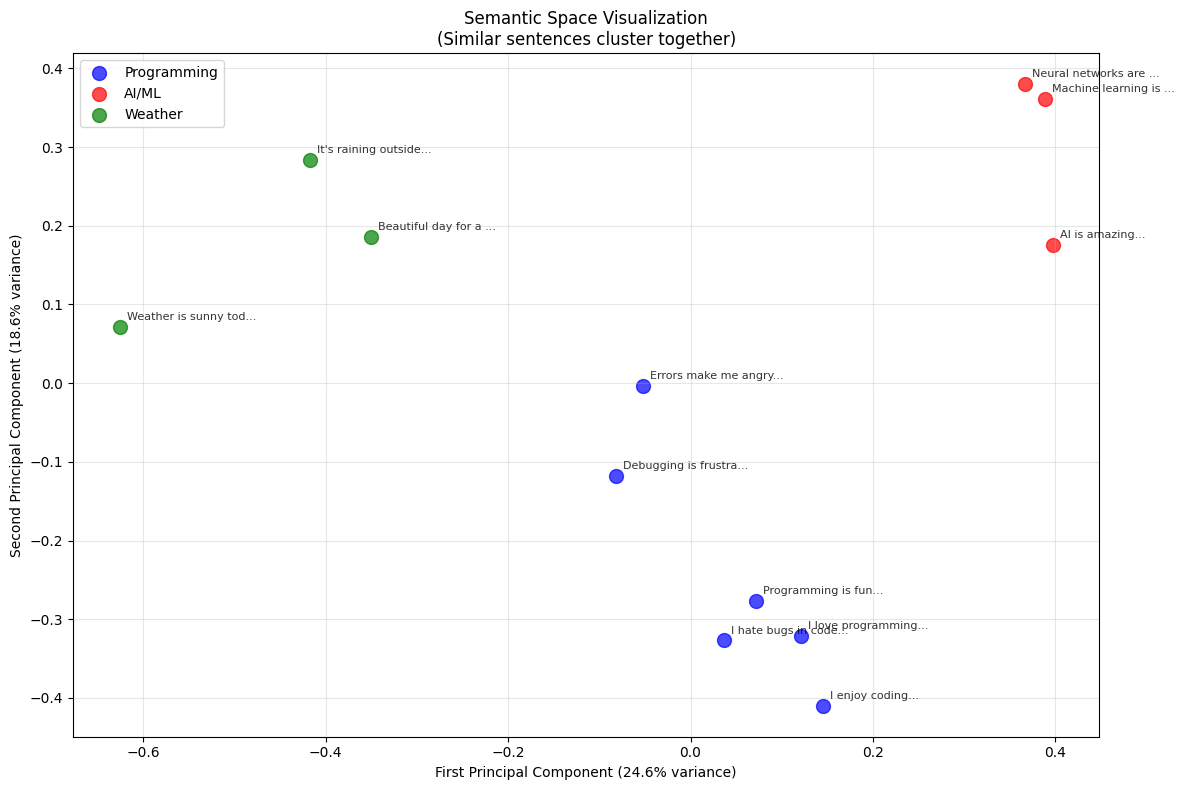

🎯 Observation: Related sentences cluster together in semantic space!


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_semantic_space():
    """visualize words distributions in vector space"""
    
    # prepare test sentences
    sentences = [
        "I love programming",
        "I enjoy coding", 
        "Programming is fun",
        "I hate bugs in code",
        "Debugging is frustrating",
        "Errors make me angry",
        "Machine learning is fascinating", 
        "AI is amazing",
        "Neural networks are cool",
        "Weather is sunny today",
        "It's raining outside",
        "Beautiful day for a walk"
    ]
    
    # get sentences' embeddings
    embeddings = []
    for sentence in sentences:
        emb = get_sentence_embedding(sentence).numpy().flatten()
        embeddings.append(emb)
    
    # reduce to 2d to visualize
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # create visualization
    plt.figure(figsize=(12, 8))
    
    # categorized by topics
    programming_indices = [0, 1, 2, 3, 4, 5]  # programming related
    ai_indices = [6, 7, 8]  # AI related  
    weather_indices = [9, 10, 11]  # weather related
    
    plt.scatter(embeddings_2d[programming_indices, 0], 
               embeddings_2d[programming_indices, 1], 
               c='blue', label='Programming', s=100, alpha=0.7)
    
    plt.scatter(embeddings_2d[ai_indices, 0], 
               embeddings_2d[ai_indices, 1], 
               c='red', label='AI/ML', s=100, alpha=0.7)
    
    plt.scatter(embeddings_2d[weather_indices, 0], 
               embeddings_2d[weather_indices, 1], 
               c='green', label='Weather', s=100, alpha=0.7)
    
    # adds tag
    for i, sentence in enumerate(sentences):
        plt.annotate(sentence[:20] + "...", 
                    (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)
    
    plt.title("Semantic Space Visualization\n(Similar sentences cluster together)")
    plt.xlabel(f"First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)")
    plt.ylabel(f"Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("🎯 Observation: Related sentences cluster together in semantic space!")

visualize_semantic_space()